This notebook explores graph algorithms that could be used to store data for the game.

It creates a graph (using networkx) similar to one that would be created during the game; each node has a word attribute.  The graph is visualized using matplotlib.


In [1]:
# Import libraries
import networkx as nx
import random
import matplotlib.pyplot as plt

#Temp sentences
sentences = [
['one', 'two', 'three'],
['three', 'four', 'five']
]

In [2]:
#Create a new graph
graph = nx.MultiGraph()

#Create a class for the nodes, as this will make it easier to access the word
class NodeObject():
    def __init__(self, word):
        self.word = word

#For each sentence, all composite words are added as nodes with edges between words that are next to each other
for sentence in sentences: 
    new_node = None
    old_node = None
    for word in sentence:
        new_node = NodeObject(word)
        graph.add_node(new_node, word=new_node.word)
        if old_node: 
            graph.add_edge(new_node, old_node)
        old_node = new_node

#Add some extra nodes with words that are not in any of the sentences (make things more interesting?)
for x in range(3):
    word = "anything"
    new_node = NodeObject(word)
    graph.add_node(new_node, word=new_node.word)
    for y in range(len(graph.nodes())):
        graph.add_edge(new_node, graph.nodes()[y])
    
        

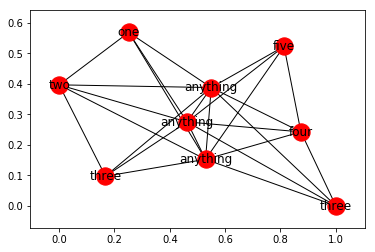

In [3]:
#Draw the graph
labels = nx.get_node_attributes(graph, 'word')
nx.draw_networkx(graph, labels=labels)
plt.show()

In [10]:
#This is a breadth first search, using a queue and iterating over the nodes in the queue

def next_neighbors(word, node):
    return [neighbor for neighbor in graph.neighbors(node) if neighbor.word == word]

def breadth_first(graph, sentence):
    sentences_found = []
    the_queue = [] 
    
    the_queue = [(node, {node}) for node in graph.nodes() if node.word == sentence[0]]
        
    while len(the_queue):
        current_node, collected_words = the_queue.pop(0)
        
        if sentence[-1] == current_node.word:
            return collected_words
        
        neighbors = next_neighbors(sentence[len(collected_words)], current_node)

        for node in neighbors:
            if node not in collected_words:
                the_queue.append((node, collected_words.union({node})))

            
for sentence in sentences:
    print 'Looking for the following sentence: ', sentence
    found = breadth_first(graph, sentence)
    for node in found:
        print node.word
    
    

Looking for the following sentence:  ['one', 'two', 'three']
three
two
one
Looking for the following sentence:  ['three', 'four', 'five']
four
five
three


In [37]:
#This function is a recursive breadth first search

def paths_matching_sentence(graph, sentence, collected_words=None, is_start_of_sentence=True):

    if len(sentence) == 0: #base case - we have finished looking through the sentence
        return collected_words
    
    else:
        if is_start_of_sentence: 
            collected_words = [] #initialize a new list to store the nodes found
            #search the whole graph for starting nodes:
            current_nodes = [node for node in graph.nodes() if node.word == sentence[0]] 

        else:
            #search the neighbors of the previously added node for matching words
            current_nodes = [neighbor for neighbor in graph.neighbors(collected_words[-1]) if neighbor.word == sentence[0]]
   
        for node in current_nodes: #iterate through the matches, and for each one
            collected_words.append(node) #store the node, and call the function again for the next word:
            return paths_matching_sentence(graph, sentence[1:], collected_words, is_start_of_sentence=False)

        

        
for sentence in sentences:
    match = paths_matching_sentence(graph, sentence)

    if match:
        print 'MATCH',
        for item in match:
            print item.word,
    else:
        print 'no match'



MATCH one two three MATCH three four five
